# __Creating a Cohort of Songs__

## __Importing Dependencies__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes
from sklearn.naive_bayes import BernoulliNB # Bernoulli Naive Bayes
from sklearn.svm import SVR, SVC # Support Vector Regression and Classification
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## __Loading Dataset__

In [3]:
df = pd.read_csv('rolling_stones_spotify.csv', encoding='utf-8')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


**Observation**

- Drop column: `Unnamed: 0`
- Rename columns: `release_date`, `track_number`, `duration_ms`
- Dtype change: `Object` to `datetime64` for release date

## __Data Cleaning__

### **Drop Unnamed: 0 Column**

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

### **Rename columns: `release_date`, `track_number`, `duration_ms`**

In [7]:
df.columns = df.columns.str.replace('_', ' ', regex=False)

### **Release Date Data Type Change**

In [8]:
df['release date'] = pd.to_datetime(df['release date'])

df['release date month'] = df['release date'].dt.month
df['release year'] = df['release date'].dt.year

In [9]:
df.head()

,name,album,release date,track number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration ms,release date month,release year
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,6,2022
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,6,2022
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,6,2022
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,6,2022
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,6,2022


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                1610 non-null   object        
 1   album               1610 non-null   object        
 2   release date        1610 non-null   datetime64[ns]
 3   track number        1610 non-null   int64         
 4   id                  1610 non-null   object        
 5   uri                 1610 non-null   object        
 6   acousticness        1610 non-null   float64       
 7   danceability        1610 non-null   float64       
 8   energy              1610 non-null   float64       
 9   instrumentalness    1610 non-null   float64       
 10  liveness            1610 non-null   float64       
 11  loudness            1610 non-null   float64       
 12  speechiness         1610 non-null   float64       
 13  tempo               1610 non-null   float64     

- `Unnamed: 0` columns successfully droped.

- Data type for release date changed to `datetime64[ns, UTC]`

- Updated column names for `release date, track number, duration ms`

### __More Checks__

In [11]:
drop_columns = ['release date only']

In [12]:
df.iloc[559]

name                  You’re Gonna Miss Me When I’m Gone - Live
album                           Live At The Checkerboard Lounge
release date                                2012-07-09 00:00:00
track number                                                  1
id                                       2BA4wk0HsgJO9iyvKr8hiE
uri                        spotify:track:2BA4wk0HsgJO9iyvKr8hiE
acousticness                                             0.0114
danceability                                              0.513
energy                                                    0.881
instrumentalness                                         0.0229
liveness                                                  0.967
loudness                                                 -6.142
speechiness                                              0.0618
tempo                                                   110.215
valence                                                   0.737
popularity                              

In [13]:
df.iloc[1442]

name                        She Said Yeah - Remastered 2002
album                 December’s Children (And Everybody’s)
release date                            1965-12-04 00:00:00
track number                                              1
id                                   53vGEyQBnwogek7ZddmLEE
uri                    spotify:track:53vGEyQBnwogek7ZddmLEE
acousticness                                         0.0289
danceability                                          0.401
energy                                                0.858
instrumentalness                                      0.031
liveness                                             0.0571
loudness                                             -7.649
speechiness                                           0.067
tempo                                               111.303
valence                                                 0.8
popularity                                               24
duration ms                             

In [14]:
df.iloc[6]

name                                          Angie - Live
album                                   Licked Live In NYC
release date                           2022-06-10 00:00:00
track number                                             7
id                                  3R1Vq1RS6mWNSD2oni6jNf
uri                   spotify:track:3R1Vq1RS6mWNSD2oni6jNf
acousticness                                         0.561
danceability                                         0.262
energy                                                0.81
instrumentalness                                  0.000003
liveness                                             0.972
loudness                                            -6.851
speechiness                                         0.0969
tempo                                                77.52
valence                                              0.394
popularity                                              31
duration ms                                         2455

### __Check for Missing Values__

In [15]:
df.isnull().sum()

name                  0
album                 0
release date          0
track number          0
id                    0
uri                   0
acousticness          0
danceability          0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
valence               0
popularity            0
duration ms           0
release date month    0
release year          0
dtype: int64

No null or missing values observed.

### **Define Numeric Features**

In [16]:
numeric_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                'popularity', 'duration_ms']


## __EDA__

### **Popular Album Analysis**

**Tops 2 Albums by Popularity**

In [17]:
# Identify the 2 albums with the highest popularity
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)
album_popularity.head(2)

album
Sticky Fingers (Remastered)    53.3
Some Girls                     48.1
Name: popularity, dtype: float64

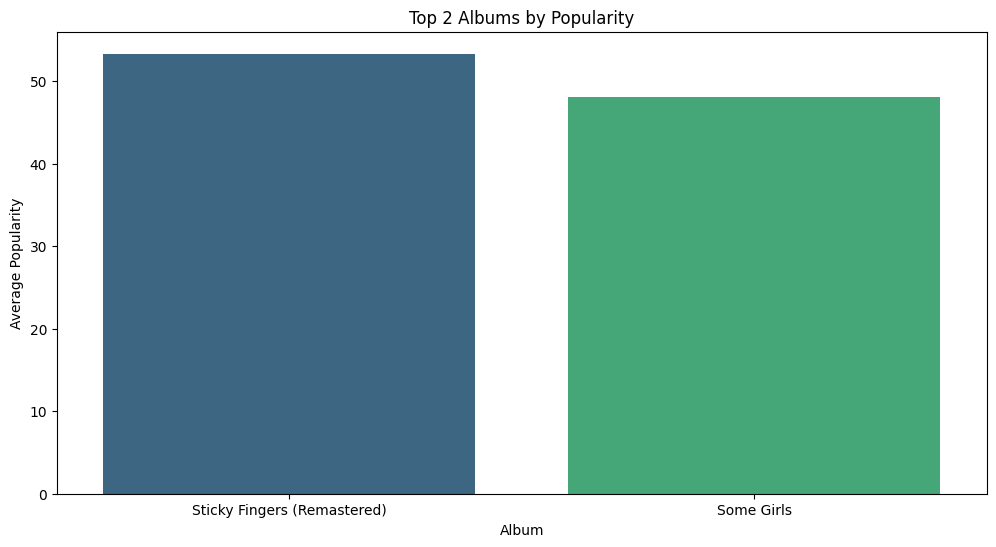

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=album_popularity.head(2).index, y=album_popularity.head(2).values, palette='viridis')
plt.xticks(rotation=0)
plt.title('Top 2 Albums by Popularity')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.show()

**Top Albums with Popular Songs**

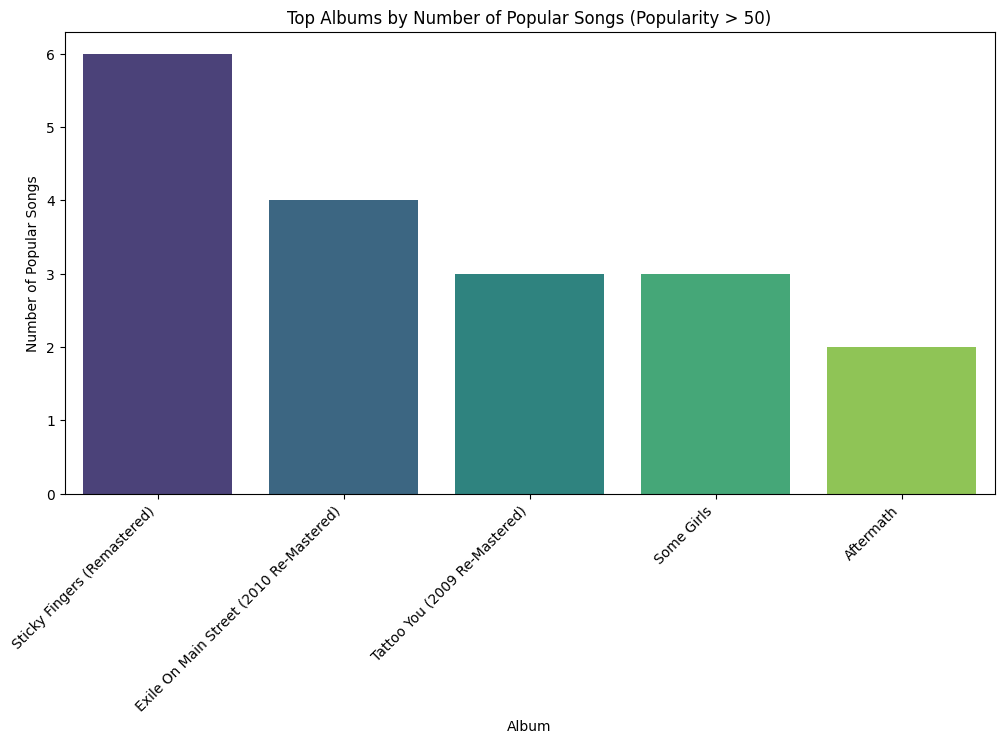

album
Sticky Fingers (Remastered)                6
Exile On Main Street (2010 Re-Mastered)    4
Tattoo You (2009 Re-Mastered)              3
Some Girls                                 3
Aftermath                                  2
Name: count, dtype: int64

In [19]:
# Filter for popular songs (popularity > 50)
popular_songs = df[df['popularity'] > 50]

# Count the number of popular songs per album
top_albums = popular_songs['album'].value_counts().head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_albums.index, y=top_albums.values, palette='viridis')
plt.title('Top Albums by Number of Popular Songs (Popularity > 50)')
plt.ylabel('Number of Popular Songs')
plt.xlabel('Album')
plt.xticks(rotation=45, ha='right')
plt.show()

top_albums

**Observations**

**Top 5 albums by number of popular songs**

- Sticky Fingers (Remastered) had `6` popular songs

- Exile On Main Street (2010 Re-Mastered) had `4` popular songs

- Tattoo You (2009 Re-Mastered) had `3` popular songs

- Some Girls had `3` popular songs

- Aftermath had `2` popular songs

**Top 2 albums by overall popularity**

- Sticky Fingers (Remastered) is the most popular with a mean of `53.3`

- Some Girls  is the most popular with a mean of `48.1`

### **Feature Analysis**

In [20]:
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

**Distribution of Key Audio Features**

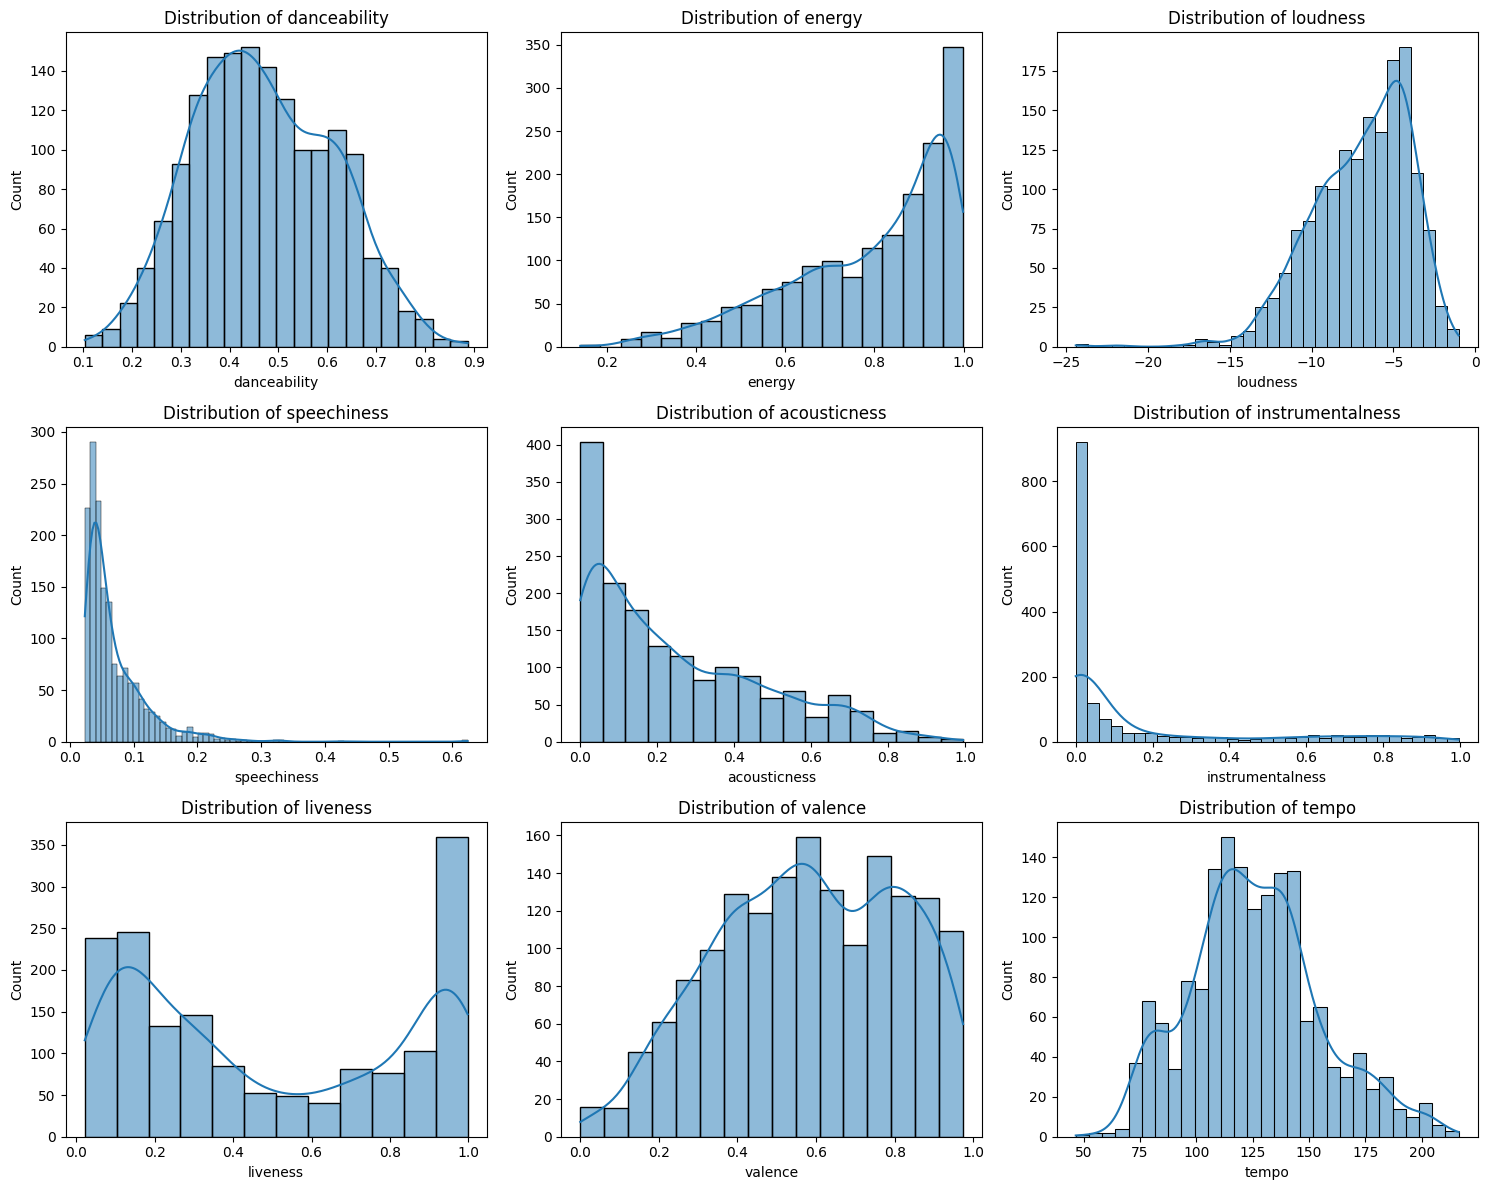

In [21]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**Observations**

**Danceability**
- Shape: Slightly right-skewed, almost normal.

- Range: Mostly between 0.3 and 0.7.

- Peak: Around 0.5.

- Interpretation: Most songs in the dataset have moderate danceability.

**Energy**
- Shape: Strong right-skew.

- Range: 0.2 to 1.0.

- Peak: Near 1.0.

- Interpretation: Most songs in the dataset are of high-energy.

**Loudness**
- Shape: Slightly skewed left.

- Range: -25 dB to 0 dB.

- Peak: Around -5 dB.

- Interpretation: Loud tracks are more common in the dataset.

**Speechiness**
- Shape: Heavily right-skewed.

- Range: 0 to ~0.6.

- Peak: Around 0.05.

- Interpretation: Most tracks have very low speech content (not spoken word).

**Acousticness**
- Shape: Right-skewed.

- Range: 0 to 1.

- Peak: Near 0.

- Interpretation: Many tracks are non-acoustic or electronically produced.

**Instrumentalness**
- Shape: Extremely right-skewed.

- Range: 0 to 1.

- Peak: Near 0.

- Interpretation: Majority of tracks are vocal-based; instrumental-only tracks are rare.

**Liveness**
- Shape: Bimodal.

- Peaks: Around 0.2 and close to 1.

- Interpretation: Mix of studio and live recordings, with some clear live recordings near 1.0.

**Valence**
- Shape: Fairly uniform/slightly right-skewed.

- Range: 0 to 1.

- Interpretation: The distribution suggests that emotional positivity is well spread, with more tracks leaning toward the cheerful side.

**Tempo**
- Shape: Roughly normal distribution.

- Range: 50 to 200 BPM.

- Peak: Around 120 BPM.

- Interpretation: Based on the distribution, most songs are in a standard pop/EDM tempo range.

**Correlation Matrix**

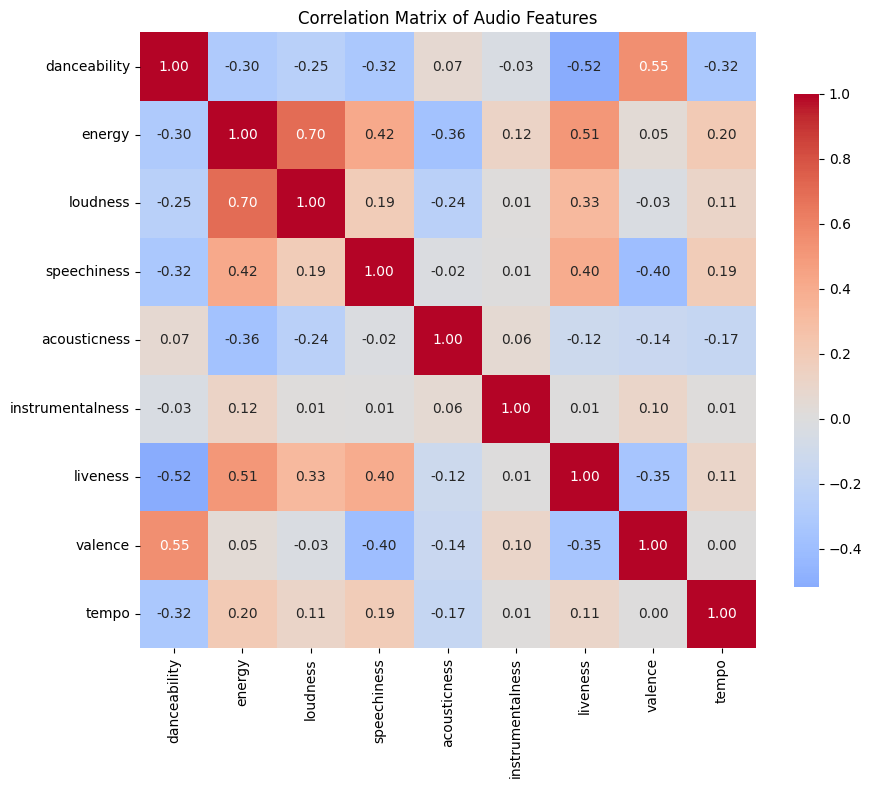

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, center=0)
plt.title('Correlation Matrix of Audio Features')
plt.show()

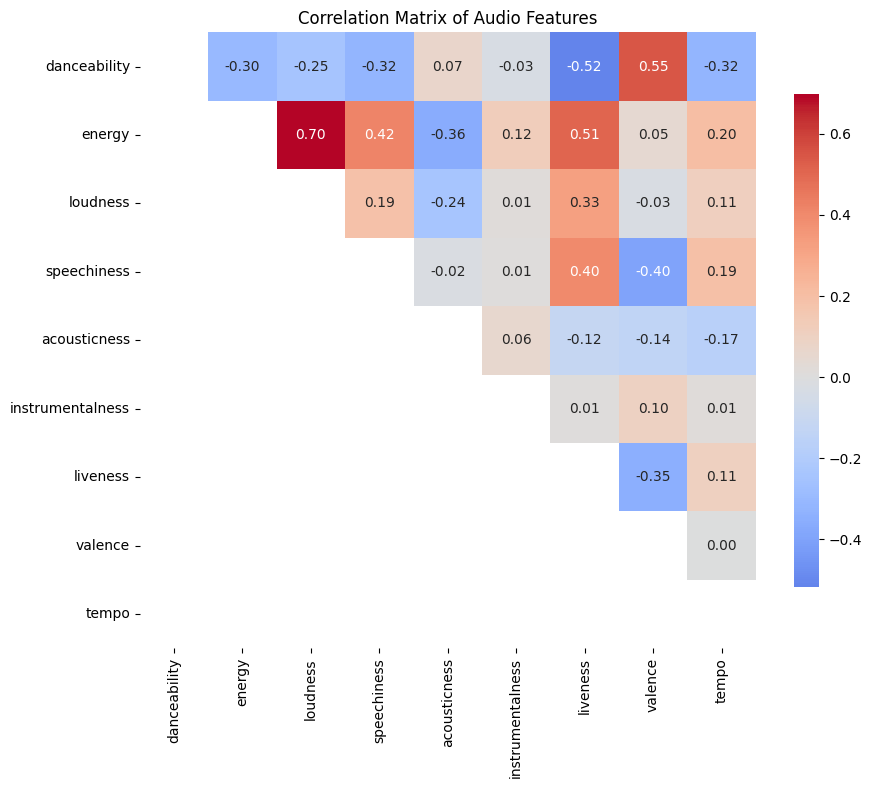

In [23]:
mask = np.tril(np.ones_like(df[features].corr(), dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, center=0, mask=mask)
plt.title('Correlation Matrix of Audio Features')
plt.show()

**Observations**

**Strongest Positive Correlations**
- Energy & Loudness → `+0.70`: Loud songs tend to have higher energy.

- Danceability & Valence → `+0.55`: Happier songs are usually more danceable.

- Energy & Valence → `+0.51`: Energetic songs often feel more positive.

**Strongest Negative Correlations**
- Danceability & Acousticness → `−0.52`: More acoustic songs are less danceable.

- Energy & Acousticness → `−0.36`: Acoustic songs are typically less energetic.

- Loudness & Acousticness → `−0.24`: Acoustic tracks tend to be quieter.

- Valence & Speechiness → `−0.40`: Tracks with more speech tend to be less positive in tone.

- Liveness & Valence → `−0.35`: Live performances may feel less cheerful.

**Near-Zero or Weak Correlations**
- Tempo shows minimal correlation with most other features.

- Instrumentalness is weakly correlated with all features, suggesting it's an independent attribute.

- Speechiness has weak/near-zero correlations with most variables except a mild positive with acousticness (`+0.40`).

**Summary of Highlights**
- High-energy, loud, and positive songs tend to be danceable.

- Acoustic songs are generally the opposite: quieter, less energetic, and less danceable.

- Valence (positivity) seems to act as a central mood indicator, connected to both danceability and energy.

- Speech-heavy or live tracks tend to feel less upbeat.

### **Popularity Analysis**

**Popularity Over Time**

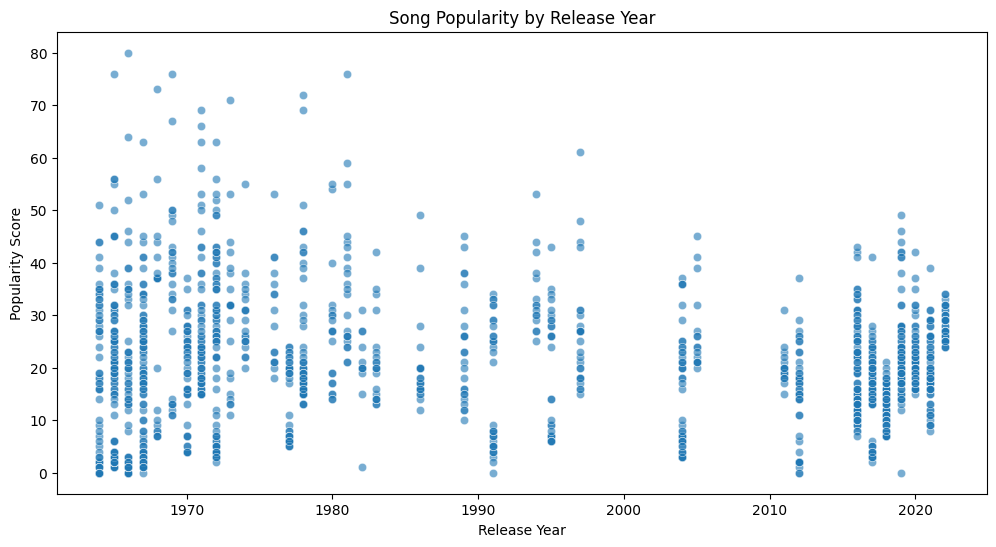

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release year', y='popularity', data=df, alpha=0.6)
plt.title('Song Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity Score')
plt.show()

**Observations**

**1960s–1980s:**
- Dense clustering of data points.

- Wide range of popularity, with many songs between 0 and 70+.

- Several outliers reaching popularity scores above 80.

- Suggests older music still maintains significant popularity.

**1990s–2000s:**
- Noticeable drop in song density.

- Fewer songs included; possibly due to sampling or dataset filtering.

- Popularity remains varied, but with fewer high scores.

**2010s–2020s:**
- More consistent distribution again, with a modest increase in song count.

- Most songs fall between 10 and 50 popularity.

- No extreme popularity outliers like in the 1960s–70s.

- Recent songs tend to cluster around mid-level popularity.

**Summary of Trends**
- No strong linear trend between release year and popularity.

- Popular songs appear in every decade, though high popularity was more frequent in the earlier decades (possibly due to “timeless classics”).

- Variability in popularity is high across all decades, suggesting that release year alone is not a strong predictor of popularity.

**Popularity vs Audio Features**

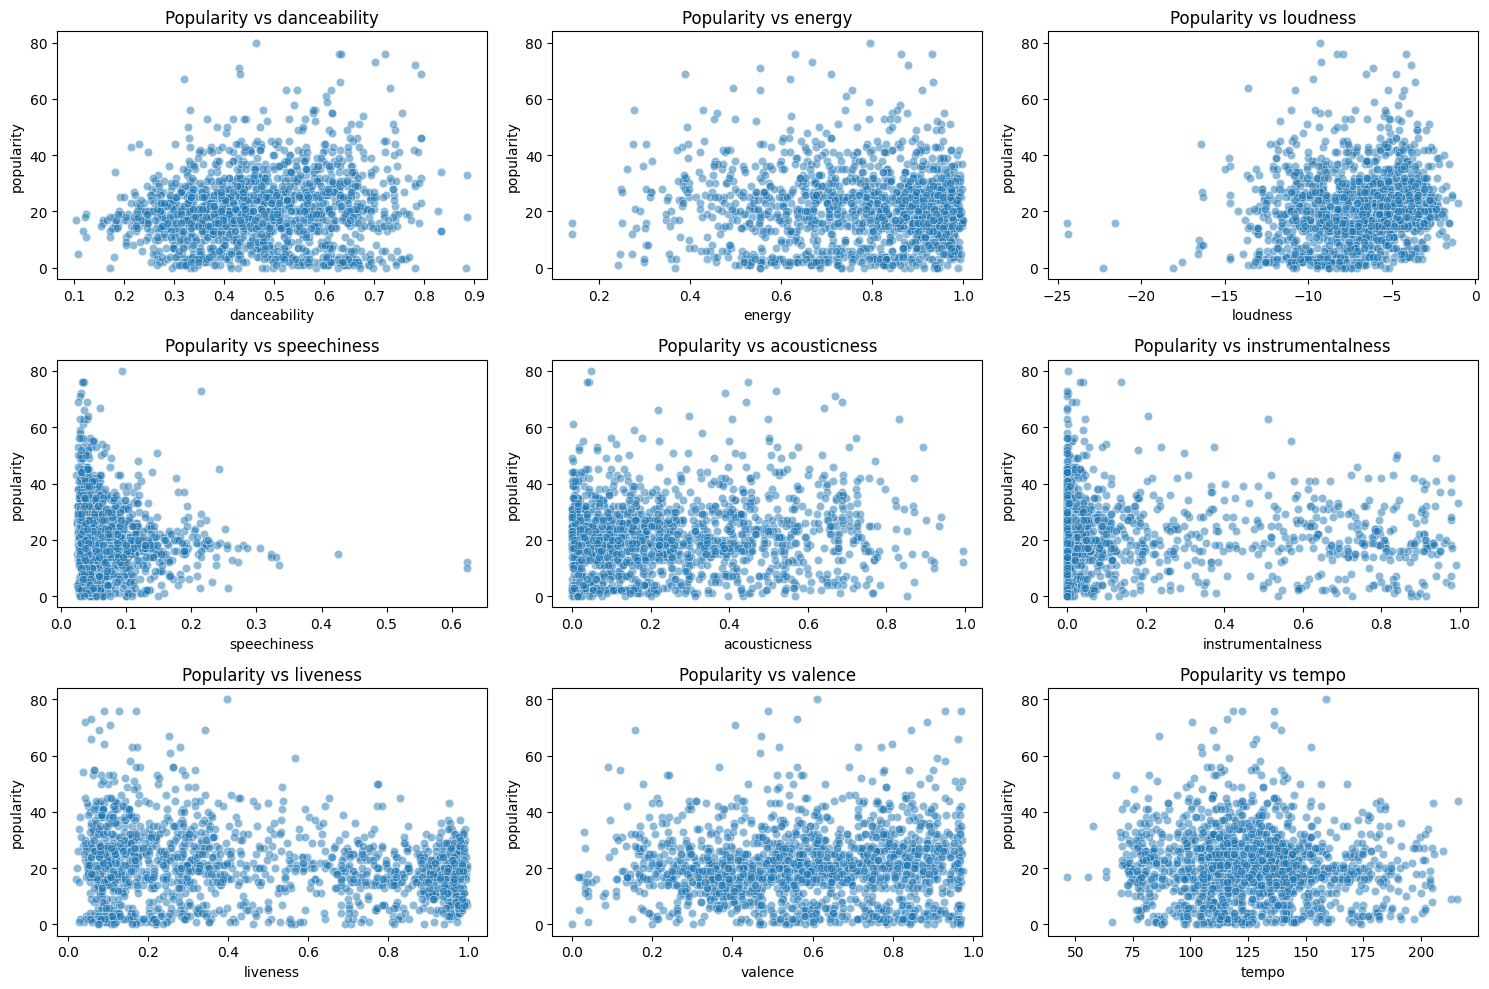

In [25]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=feature, y='popularity', data=df, alpha=0.5)
    plt.title(f'Popularity vs {feature}')
plt.tight_layout()
plt.show()


**Observations**

**Strong Negative Correlations:**
- Speechiness: Shows the clearest inverse relationship - songs with more speech-like qualities (podcasts, spoken word) tend to be much less popular

- Acousticness: Acoustic songs generally perform worse in popularity, with most popular tracks being more electronic/produced

**Moderate Relationships:**
- Danceability: Positive correlation - more danceable songs tend to be more popular

- Energy: Positive correlation - higher energy tracks generally achieve greater popularity

- Loudness: Positive correlation - louder songs (closer to `0 dB`) tend to be more popular

**Weak/No Clear Patterns:**
- Instrumentalness: Most popular songs have very low instrumentalness (vocals present)

- Liveness: Live recordings don't show a strong relationship with popularity

- Valence: Emotional positivity/negativity shows little correlation with popularity

- Tempo: No clear linear relationship, though there may be sweet spots around 100-150 BPM

**Overall Insights**
- The data suggests that popular music tends to favor produced, energetic, danceable songs with vocals over acoustic, speech-heavy, or instrumental content. 

- However, many audio features show wide variance at all popularity levels, indicating that musical success depends on complex combinations of factors rather than single characteristics.

## __Cluster Analysis__

#### **Identifying Number of Clusters**

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


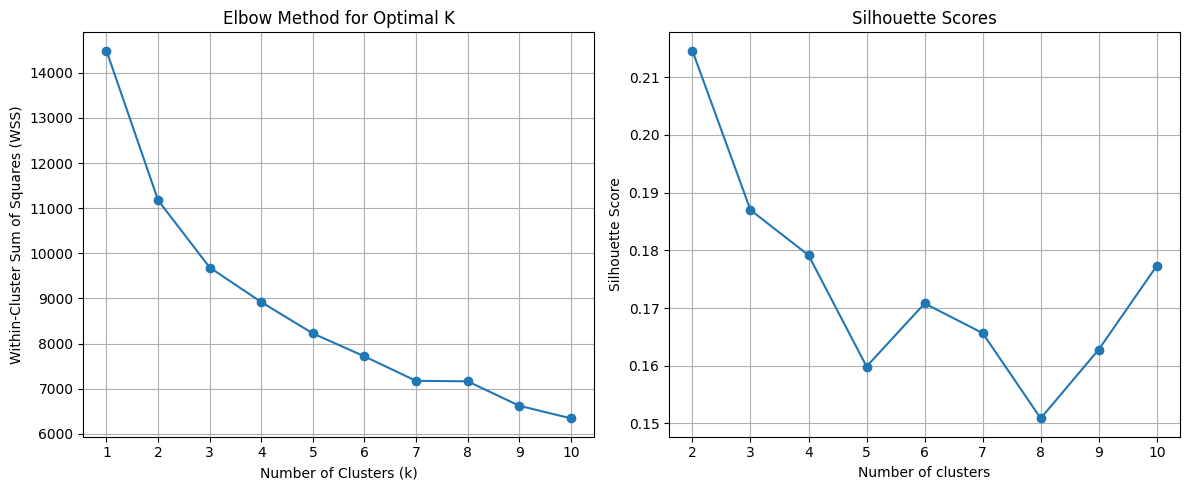

In [27]:
from sklearn.metrics import silhouette_score

wss = []
silhouette_scores = []
k_range = range(2, 11)

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wss.append(kmeans.inertia_)
    if k >= 2:
        score = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(range(1, 11))
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(list(k_range))
plt.grid()

plt.tight_layout()
plt.show()


**Observation**

**Elbow Method**

Looking at this elbow method graph, the elbow appears to be at `K = 3`.

- **From K=1 to K=3**: There's a steep, dramatic decline in WCSS
- **At K=3**: The curve begins to flatten considerably
- **From K=3 onwards**: The decreases become much more gradual and linear

- While there's some continued decrease after K=3, the most pronounced "bend" or elbow in the curve occurs at K=3, making it the optimal number of clusters according to this method. 

- This suggests that 3 clusters would provide a good balance between model complexity and explained variance in your clustering analysis.

**Silhouette Scores**

Looking at this silhoutte scores graph, the elbow appears to be at `K = 4`.

- **From K=1 to K=3**: There's a steep, dramatic decline in WCSS
- **At K=3**: The curve doesnt flatten
- **From K=4 onwards**: There is a gradual decrease

- Since the silhouette shows that the optimal numbers of cluster is 4, we will use `K = 4` onwards for our algorythms


#### **Clustering Algorithms**

##### **Popularity by Dancebility**

In [28]:
X = df[['popularity','danceability']].values

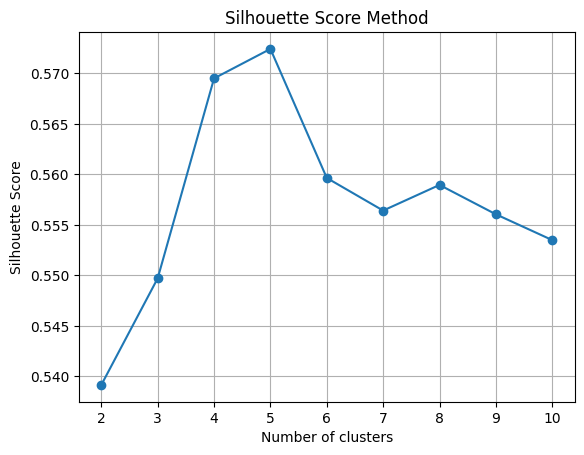

In [29]:
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init=10,  init='k-means++', random_state=42)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

**Observation**

- Based on the Silhouette Score Method plot, the optimal number of clusters is 5. 

- This is the point where the silhouette score reaches its highest value, indicating the best clustering solution.

In [30]:
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]

# Fit the model with the optimal number of clusters
model = KMeans(n_clusters=optimal_clusters, n_init=10, init='k-means++', random_state=42)
y_kmeans = model.fit_predict(X)

In [31]:
y_kmeans

array([1, 1, 1, ..., 4, 4, 1])

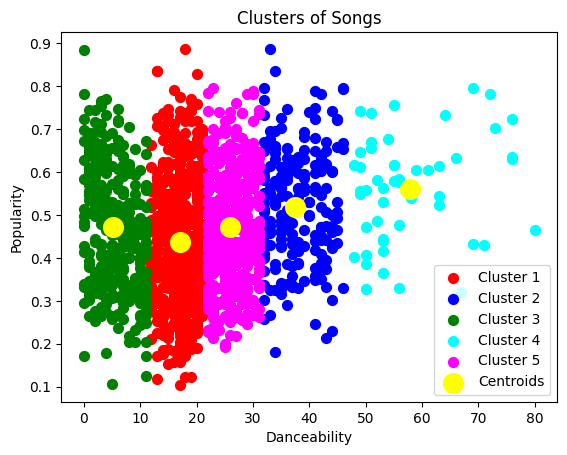

In [32]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red',  label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Songs')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend()
plt.show()

**Observations**

**Cluster 1 (Red)**
- This cluster is characterized by low danceability and a wide range of Popularity. 
- The songs in this cluster are likely to be those that are not easy to dance to but vary significantly in their intensity.

**Cluster 2 (Blue)**
- This cluster has medium-to-high danceability and a wide range of Popularity. 
- This group likely contains a mix of songs suitable for dancing, from those with low energy to high energy.

**Cluster 3 (Green)**
- This cluster has the lowest danceability of all the groups, as seen by its position on the far left of the x-axis. 
- The songs here have a wide range of Popularity, suggesting they are a mix of intense and mellow tracks that are generally not danceable.

**Cluster 4 (Cyan)**
- This cluster has the highest danceability of all the groups, positioned on the far right of the x-axis. 
- The songs here are likely to be popular dance tracks or upbeat songs. 
- Their Popularity are generally medium to high.

**Cluster 5 (Magenta)**
- This cluster has medium danceability and a wide range of Popularity. 
- This group is similar to Cluster 2 but is located slightly to the left, indicating songs that are somewhat less danceable on average. 
- This likely represent a mix of pop, rock, or other genres that are more moderately paced.

#### **Popularity by Energy**

In [33]:
X_2 = df[['popularity','energy']].values

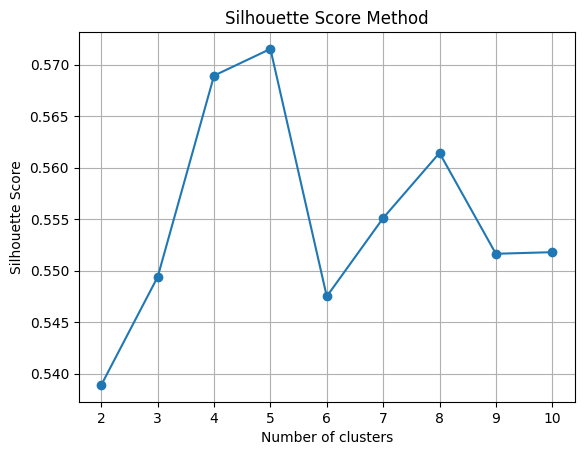

In [34]:
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init=10,  init='k-means++', random_state=42)
    model.fit(X_2)
    score = silhouette_score(X_2, model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

**Observation**

- Based on the Silhouette Score Method plot, the optimal number of clusters is 5. 

- This is the point where the silhouette score reaches its highest value, indicating the best clustering solution.

In [35]:
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]

# Fit the model with the optimal number of clusters
model = KMeans(n_clusters=optimal_clusters, n_init=10, init='k-means++', random_state=42)
y_kmeans_2 = model.fit_predict(X_2)

In [36]:
y_kmeans_2

array([4, 4, 4, ..., 0, 0, 4])

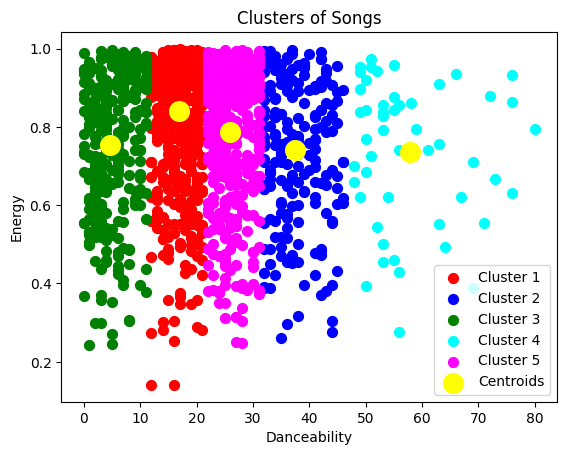

In [37]:
plt.scatter(X_2[y_kmeans == 0, 0], X_2[y_kmeans == 0, 1], s = 50, c = 'red',  label = 'Cluster 1')
plt.scatter(X_2[y_kmeans == 1, 0], X_2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2[y_kmeans == 2, 0], X_2[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_2[y_kmeans == 3, 0], X_2[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_2[y_kmeans == 4, 0], X_2[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Songs')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

**Observations**

**Cluster Density and Song Diversity**
- The clusters are not uniformly distributed. `Clusters 1 (Red)`, `5 (Magenta)`, and `2 (Blue)` appear to be more dense and tightly packed.
- This suggesting they contain a larger number of songs that fit within a more defined range of danceability. 
- In contrast, `Clusters 3 (Green)` and `4 (Cyan)` are more spread out, indicating a wider variety of songs within those danceability ranges.

**Interpreting the "Energy" Metric within Clusters**
- While the primary segmentation is based on danceability, the wide energy range within most clusters is significant. This means that, for example:

    - **Cluster 3 (Green)**: Includes both low-energy, non-danceable songs (e.g., ambient music, classical) and high-energy, non-danceable songs (e.g., epic movie scores, heavy metal with complex rhythms).

    - **Cluster 5 (Magenta)**: Contains a mix of mellow but rhythmic tunes and intense, moderate-tempo songs. This could be the "sweet spot" for many popular genres.

**Hypothesizing Song Genres**
- Based on the metrics, one can speculate on the type of music each cluster represents:

    - **Cluster 3 (Green)**: The "Listening Music" Cohort. Low danceability and a wide energy range suggest genres like classical, folk, ambient, or acoustic ballads.

    - **Cluster 1 (Red) and Cluster 5 (Magenta)**: The "General Pop/Rock" Cohorts. These clusters, with medium danceability and broad energy, likely contain a large number of mainstream pop, rock, indie, and alternative songs that are not exclusively for dancing.

    - **Cluster 2 (Blue) and Cluster 4 (Cyan)**: The "Dance Music" Cohorts. High danceability clearly points to genres designed for dancing. Cluster 2 may include a broader mix of rhythmic pop and hip-hop, while Cluster 4, with its consistently higher energy, is the prime candidate for high-energy dance, electronic music, and club tracks.

**Centroid Positions Reveal Cluster "Typicality"**
- The centroids provide a powerful summary of what is "typical" for each group:

- The centroids for Clusters 1, 5, and 2 are all positioned at a relatively high energy level (around 0.75), indicating that the average song in these clusters is quite energetic, even if the overall range is wide.

- The centroid for Cluster 4 (Cyan) is slightly lower on the energy axis, even though its songs tend to be high-energy. 

- This might be due to the cluster having a wider spread of energy values in its higher range, pulling the average down slightly compared to the other high-energy centroids.

#### **Popularity by Loudness**

In [38]:
X_3 = df[['popularity','loudness']].values

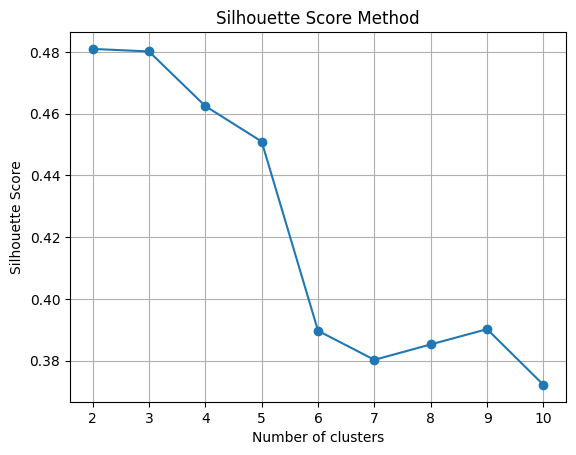

In [39]:
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init=10,  init='k-means++', random_state=42)
    model.fit(X_3)
    score = silhouette_score(X_3, model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

**Observation**

- Based on the Silhouette Score Method plot, the optimal number of clusters is 2. 

- This is the point where the silhouette score reaches its highest value, indicating the best clustering solution.

In [40]:
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]

# Fit the model with the optimal number of clusters
model = KMeans(n_clusters=optimal_clusters, n_init=10, init='k-means++', random_state=42)
y_kmeans_3 = model.fit_predict(X_3)

In [41]:
y_kmeans_3

array([0, 0, 0, ..., 0, 0, 0])

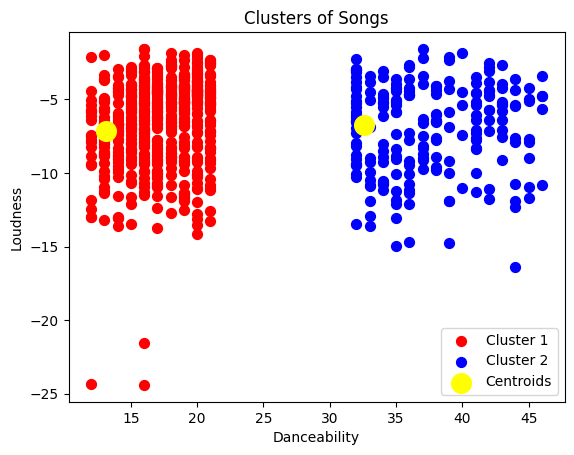

In [42]:
plt.scatter(X_3[y_kmeans == 0, 0], X_3[y_kmeans == 0, 1], s = 50, c = 'red',  label = 'Cluster 1')
plt.scatter(X_3[y_kmeans == 1, 0], X_3[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Songs')
plt.xlabel('Danceability')
plt.ylabel('Loudness')
plt.legend()
plt.show()

**Observations**

**Interpreting the Loudness Scale**
- The negative values on the y-axis are typical for a decibel (dB) scale, where 0 dB represents the maximum possible amplitude. 
- This confirms that the songs in the main bodies of both `clusters (-5 dB to -15 dB)` have a wide range of volume, from relatively loud to moderately quiet.

**Extremely Quiet Songs in Cluster 1**
- The outliers in Cluster 1, located around -25 dB, are not just low-energy; they are extremely quiet songs. 
- This provides a more concrete and actionable insight. 
- This specific sub-cohort of songs could be used for creating playlists for meditation, sleeping, or background soundscapes, as they are both non-danceable and have a very low volume.

**Consistent Loudness Profile Across Danceability**
- The fact that songs with low danceability (Cluster 1) and high danceability (Cluster 2) share a similar loudness distribution.
- This suggests that there is no inherent correlation between a song's danceability and its average volume. 
- A non-danceable track can be just as loud as a high-energy dance track. 
- This is a key insight into the dataset's characteristics.

### **Final Recommendations**

In [44]:
df['cluster'] = kmeans.fit_predict(scaled_features)
cluster_means = df.groupby('cluster')[features + ['popularity']].mean()

In [45]:
for cluster in range(optimal_clusters):
    cluster_songs = df[df['cluster'] == cluster]
    top_songs = cluster_songs.sort_values('popularity', ascending=False).head(5)

    print(f"\nCohort {cluster} - Recommended Songs:")
    for i, (_, row) in enumerate(top_songs.iterrows(), 1):
        print(f"{i}. {row['name']} (Album: {row['album']}, Popularity: {row['popularity']})")

    print("\nKey Characteristics:")
    print(cluster_means.loc[cluster].sort_values(ascending=False).head(5))



Cohort 0 - Recommended Songs:
1. Undercover (Of The Night) - Remastered 2009 (Album: Undercover (2009 Re-Mastered), Popularity: 42)
2. One Hit (To The Body) - Remastered (Album: Dirty Work (Remastered 2009), Popularity: 39)
3. Baby Please Don't Go - Live (Album: Live At The Checkerboard Lounge, Popularity: 37)
4. Start Me Up - Live Licks Tour - 2009 Re-Mastered Digital Version (Album: Live Licks, Popularity: 37)
5. Gimme Shelter - Live Licks Tour - 2009 Re-Mastered Digital Version (Album: Live Licks, Popularity: 36)

Key Characteristics:
tempo         127.053985
popularity     17.213213
energy          0.934556
liveness        0.887468
valence         0.485822
Name: 0, dtype: float64

Cohort 1 - Recommended Songs:
1. Shake Your Hips (Album: Exile On Main Street (2010 Re-Mastered), Popularity: 43)
2. Let It Loose (Album: Exile On Main Street (2010 Re-Mastered), Popularity: 42)
3. Winter - Remastered (Album: Goats Head Soup (Remastered 2009), Popularity: 38)
4. I Just Want To See His Fa

### **Recommendations**

**"Workout & Party Mix" Playlist**: 
- This is the primary use case for this cohort. 
- A playlist of songs with high danceability, high popularity, and a wide range of energy is perfect for a crowd-pleasing party or workout session.

**"Top Hits" Playlist**: 
- We will need to filter this cohort for songs with the highest danceability and the highest popularity scores `(Cluster 4)`. 
- This would create a playlist of current and past popular hits that are also very danceable.

**"Upbeat & Energetic" Playlist**: 
- We will need to focus on the sub-group of songs with both high danceability and high energy `(Cluster 4)`. 
- This allows for a consistently intense and rhythmic experience, suitable for peak workout moments or a high-energy dance party.